# Excercise 4

# Myokyung Han(20224230)

## 1. Data Loading

In [1]:
import pandas as pd

In [2]:
df_xr = pd.read_excel("../data/krw_usd_xr.xlsx")

In [3]:
df_xr["날짜"] = pd.to_datetime(df_xr["날짜"])

In [4]:
df_xr.set_index('날짜', inplace=True)

In [5]:
df_xr.columns = ['KRW/USD']

In [6]:
df_xr.head()

,KRW/USD
날짜,
1964-05-04,255.77
1964-05-05,255.77
1964-05-06,255.77
1964-05-07,255.77
1964-05-08,255.77


In [7]:
df_xr.tail(3)

,KRW/USD
날짜,
2022-04-01,1210.7
2022-04-04,1216.1
2022-04-05,1216.7


In [8]:
df_monthly = df_xr.resample('M').last()

In [9]:
df_monthly = df_monthly.loc['1998-12-31':]

In [10]:
import matplotlib.pyplot as plt

In [11]:
plt.rcParams['figure.figsize'] = (8,4)

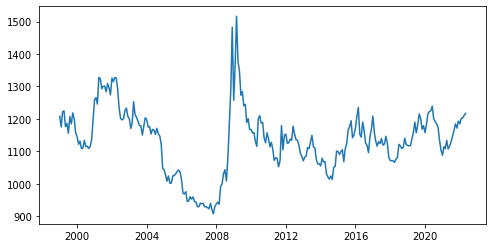

In [12]:
plt.plot(df_monthly)
plt.show()

# non stationary process !!!!! return is not cumulated.... so it's stationary 
## real exchange rate을 사용해서 future exchage rate return을 구한다. 

## Download Real Exchange Rate Data

In [13]:
# world_real_xr.xls
# https://data.worldbank.org/indicator/PA.NUS.PPPC.RF?locations=KR

In [14]:
#

In [15]:
df_real_xr = pd.read_excel('../data/world_real_xr.xls', sheet_name='Data' , skiprows=3)

In [16]:
df_real_xr.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,Price level ratio of PPP conversion factor (GD...,PA.NUS.PPPC.RF,NaN,NaN,NaN,NaN,NaN,NaN,...,0.727900,0.736202,0.717956,0.731197,0.761071,0.757008,0.754575,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Price level ratio of PPP conversion factor (GD...,PA.NUS.PPPC.RF,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,Price level ratio of PPP conversion factor (GD...,PA.NUS.PPPC.RF,NaN,NaN,NaN,NaN,NaN,NaN,...,0.347864,0.333640,0.309755,0.296809,0.266376,0.258446,0.251010,0.233199,0.229598,0.248598


In [17]:
df_real_xr.set_index('Country Code', inplace=True)

In [18]:
# df_real_xr.loc[['KOR']]
df_real_xr = df_real_xr.loc['KOR'].to_frame()

In [19]:
df_real_xr = df_real_xr.iloc[3:]

In [20]:
df_real_xr = df_real_xr.dropna()

In [21]:
df_real_xr.dtypes

KOR    object
dtype: object

In [22]:
df_real_xr['KOR']\
    = df_real_xr['KOR'].astype(float)

In [23]:
df_real_xr.dtypes

KOR    float64
dtype: object

In [24]:
from pandas.tseries.offsets import YearEnd, MonthEnd, QuarterEnd

In [25]:
df_real_xr['date'] \
    = pd.to_datetime(df_real_xr.index) + YearEnd(0)
# 0이면 같은 해, 1이면 그다음으로 넘어가나보네유......  이거 함수 찾아보기
# 

In [26]:
df_real_xr.head()

,KOR,date
1990,0.791116,1990-12-31
1991,0.806044,1991-12-31
1992,0.797917,1992-12-31
1993,0.805472,1993-12-31
1994,0.852147,1994-12-31


In [27]:
df_real_xr.set_index('date', inplace=True)

In [28]:
df_real_xr.columns = ['Real XR']

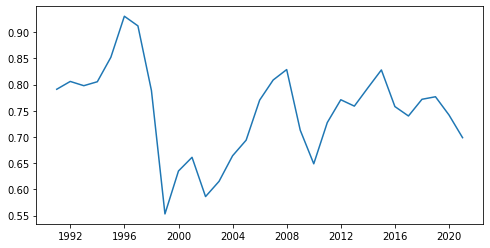

In [29]:
plt.plot(df_real_xr)
plt.show()

## 2. Exchange Rate Forecast with Real XR

In [30]:
df_merge  = df_monthly.join(df_real_xr)

In [31]:
df_merge.head(15)

,KRW/USD,Real XR
날짜,,
1998-12-31,1207.8,0.553048
1999-01-31,1175.3,NaN
1999-02-28,1222.4,NaN
1999-03-31,1224.7,NaN
1999-04-30,1176.4,NaN
1999-05-31,1186.3,NaN
1999-06-30,1155.9,NaN
1999-07-31,1206.9,NaN
1999-08-31,1184.9,NaN


## Simple but not really good way : keep december only 

In [32]:
df_dec = df_merge.dropna()

In [33]:
df_dec.head()

,KRW/USD,Real XR
날짜,,
1998-12-31,1207.8,0.553048
1999-12-31,1145.4,0.634993
2000-12-31,1259.7,0.661152
2001-12-31,1326.1,0.586139
2002-12-31,1200.4,0.615281


In [34]:
df_dec = df_dec.copy()

In [35]:
df_dec['ret'] = df_dec['KRW/USD'].pct_change()*100

In [36]:
df_dec

,KRW/USD,Real XR,ret
날짜,,,
1998-12-31,1207.8,0.553048,NaN
1999-12-31,1145.4,0.634993,-5.166418
2000-12-31,1259.7,0.661152,9.979047
2001-12-31,1326.1,0.586139,5.271096
2002-12-31,1200.4,0.615281,-9.478923
2003-12-31,1197.8,0.664054,-0.216594
2004-12-31,1043.8,0.693877,-12.856904
2005-12-31,1013.0,0.770342,-2.950757
2006-12-31,929.6,0.808781,-8.232971


In [37]:
df_dec.describe()

,KRW/USD,Real XR,ret
count,23.000000,23.000000,22.000000
mean,1131.326087,0.719342,-0.054813
std,98.043451,0.076460,9.817481
min,929.600000,0.553048,-12.856904
25%,1071.250000,0.662603,-6.852699
50%,1145.400000,0.740077,-0.845857
75%,1199.100000,0.771514,4.007632
max,1326.100000,0.828711,34.033255


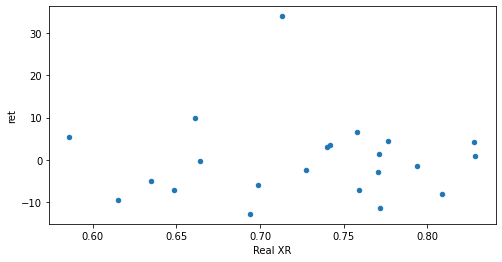

In [38]:
df_dec.plot(kind='scatter', x = 'Real XR', y = 'ret')
plt.show()

# future return 이 필요하다

In [39]:
df_dec['F.ret'] = df_dec['ret'].shift(-1)
# 다음해의 퍼센티지를 넣는다 

In [40]:
df_dec.head(5)

,KRW/USD,Real XR,ret,F.ret
날짜,,,,
1998-12-31,1207.8,0.553048,NaN,-5.166418
1999-12-31,1145.4,0.634993,-5.166418,9.979047
2000-12-31,1259.7,0.661152,9.979047,5.271096
2001-12-31,1326.1,0.586139,5.271096,-9.478923
2002-12-31,1200.4,0.615281,-9.478923,-0.216594


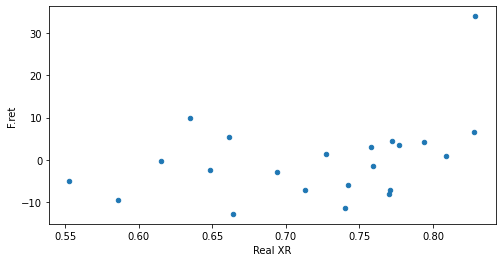

In [41]:
df_dec.plot(kind='scatter', x = 'Real XR', y = 'F.ret')
plt.show()

In [42]:
import statsmodels.api as sm

In [43]:
df = df_dec.dropna()

In [44]:
X = df[['ret', 'Real XR']]
X = sm.add_constant(X)

/Users/boysbeanxious/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [45]:
Y = df['F.ret']

In [46]:
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  F.ret   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     1.665
Date:                Sun, 17 Apr 2022   Prob (F-statistic):              0.217
Time:                        12:54:19   Log-Likelihood:                -75.840
No. Observations:                  21   AIC:                             157.7
Df Residuals:                      18   BIC:                             160.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -38.8109     22.508     -1.724      0.102     -86.098       8.476
ret           -0.1209      0.217     -0.557      0.584      -0.577       0.335
Real XR       53.5909     30.771      1.742      0.099     -11.056     118.238
==============================================================================
Omnibus:                       14.289   Durbin-Watson:                   1.878
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               13.641
Skew:                           1.451   Prob(JB):                      0.00109
Kurtosis:                       5.678   Cond. No.                         176.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
# t-value가 안좋다...
# 그렇게 의미가 있다고 볼수 없다... 
# observation이 너무 적다(데이터 개수가 21개...)
# 너무 많아도 안좋다
#....헉
# 100 ~ 300 정도가 time-series에 적합하다.

### 3. Overlapping montly forecasts

In [48]:
df_merge.head(15)

,KRW/USD,Real XR
날짜,,
1998-12-31,1207.8,0.553048
1999-01-31,1175.3,NaN
1999-02-28,1222.4,NaN
1999-03-31,1224.7,NaN
1999-04-30,1176.4,NaN
1999-05-31,1186.3,NaN
1999-06-30,1155.9,NaN
1999-07-31,1206.9,NaN
1999-08-31,1184.9,NaN


In [49]:
df_merge['Real XR'] = df_merge['Real XR'].fillna(method='ffill')
# df_merge['Real XR'] = df_merge['Real XR'].fillna(method='bfill')
# bfill로 하면 미래의 데이터를 가지고 예측하는것이기때문에 정확하지 않다...
# interplate 도 말이 안된다 보간법이죠... 이것도 future value를 알아야 하기 때문에 정확하지 않다. 

In [50]:
df_merge.head(15)

,KRW/USD,Real XR
날짜,,
1998-12-31,1207.8,0.553048
1999-01-31,1175.3,0.553048
1999-02-28,1222.4,0.553048
1999-03-31,1224.7,0.553048
1999-04-30,1176.4,0.553048
1999-05-31,1186.3,0.553048
1999-06-30,1155.9,0.553048
1999-07-31,1206.9,0.553048
1999-08-31,1184.9,0.553048


In [51]:
df_merge['ann_ret'] = df_merge['KRW/USD'].pct_change(periods=12)*100
# 1년으로 한다 
# 실제 환율을 1년주기로가지고 있기 때문에 그렇게 한건거 같다 

In [52]:
df_merge['F12.ann_ret'] = df_merge['ann_ret'].shift(-12)


In [53]:
df_merge.head(15)

,KRW/USD,Real XR,ann_ret,F12.ann_ret
날짜,,,,
1998-12-31,1207.8,0.553048,NaN,-5.166418
1999-01-31,1175.3,0.553048,NaN,-4.526504
1999-02-28,1222.4,0.553048,NaN,-7.411649
1999-03-31,1224.7,0.553048,NaN,-9.504368
1999-04-30,1176.4,0.553048,NaN,-5.618837
1999-05-31,1186.3,0.553048,NaN,-4.425525
1999-06-30,1155.9,0.553048,NaN,-3.555671
1999-07-31,1206.9,0.553048,NaN,-7.515121
1999-08-31,1184.9,0.553048,NaN,-6.422483


In [54]:
# drop 전에 컬럼을 고르는게 좋다 안그러면 데이터를 먼저 날려버릴수 있다...

In [55]:
df = df_merge[['F12.ann_ret', 'Real XR']]

In [56]:
df = df.dropna()

In [57]:
X = sm.add_constant(df['Real XR'])

/Users/boysbeanxious/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [58]:
Y = df ['F12.ann_ret']

In [59]:
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            F12.ann_ret   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     36.81
Date:                Sun, 17 Apr 2022   Prob (F-statistic):           4.44e-09
Time:                        12:54:19   Log-Likelihood:                -1007.9
No. Observations:                 269   AIC:                             2020.
Df Residuals:                     267   BIC:                             2027.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -35.7590      6.004     -5.956      0.000     -47.580     -23.938
Real XR       50.3244      8.295      6.067      0.000      33.993      66.656
==============================================================================
Omnibus:                      129.008   Durbin-Watson:                   0.221
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              695.742
Skew:                           1.910   Prob(JB):                    8.35e-152
Kurtosis:                       9.891   Cond. No.                         20.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
# coef/stderr -> t 에러가 작고 coef가 커야 좋은것이므로 t가 크면 클수록 좋다